In [37]:
from ipynb.fs.full.Notebook1 import *
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


## Descriptive Data Analysis

a Deeper look at the descriptive visualization of profits and sales.

For the following visualizations we will use the top 10 - 20 cities in sales performance. We will start by evaluating descriptive statistics.

In [38]:
new_sales = df.groupby('City').sum()
performers = new_sales.sort_values(by='Sales', ascending=False).head(20)

performers['Sales'].describe()



/var/folders/z5/jt2rq2vj211dw27l027q0rsc0000gn/T/ipykernel_36944/3686427969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_sales = df.groupby('City').sum()


count        20.000000
mean      64535.498330
std       61826.710323
min       20131.932200
25%       25018.114500
50%       42750.643000
75%       75647.823550
max      256368.161000
Name: Sales, dtype: float64

In [39]:
performers['Profit'].describe()

count       20.000000
mean      7861.473960
std      17232.785967
min     -13837.767400
25%      -3040.613575
50%       5845.430050
75%      10809.238400
max      62036.983700
Name: Profit, dtype: float64

A cat and whisker plot might help visualize the statistics from above.

/var/folders/z5/jt2rq2vj211dw27l027q0rsc0000gn/T/ipykernel_36944/2300702293.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_sales = df.groupby('City').sum()


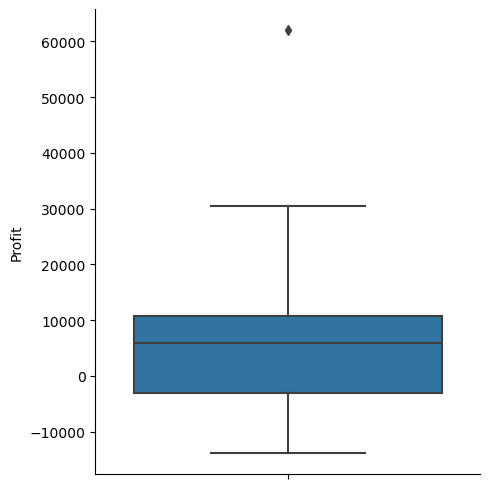

In [40]:
new_sales = df.groupby('City').sum()
performers = new_sales.sort_values(by='Sales', ascending=False).head(20)

sns.catplot(data=performers, y="Profit", kind="box")

plt.show()

Now for a couple distribution plots for sales and profits respectively. At this point, we can clearly see the database is positively skewed.

/var/folders/z5/jt2rq2vj211dw27l027q0rsc0000gn/T/ipykernel_36944/955182886.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(performers, x="Sales", kde=True, palette='pastel', color='purple')


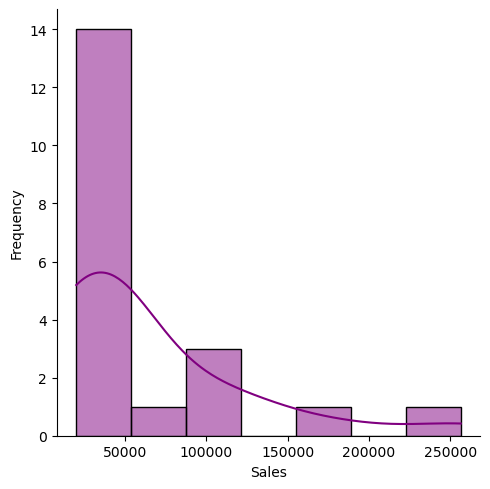

/var/folders/z5/jt2rq2vj211dw27l027q0rsc0000gn/T/ipykernel_36944/955182886.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(performers, x="Profit", kde=True, palette='pastel', color='darkblue')


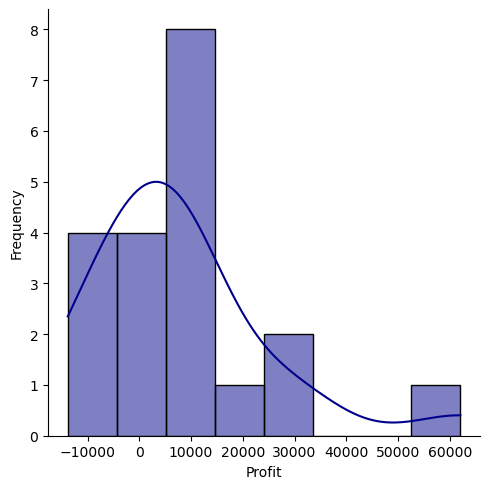

In [41]:
sns.displot(performers, x="Sales", kde=True, palette='pastel', color='purple')
plt.ylabel("Frequency")
plt.show()
sns.displot(performers, x="Profit", kde=True, palette='pastel', color='darkblue')
plt.ylabel("Frequency")
plt.show()



In case you were curious which cities were supporting the most sales. This scatter plot shows the top 10 cities with New York leading the way by a significant margin.

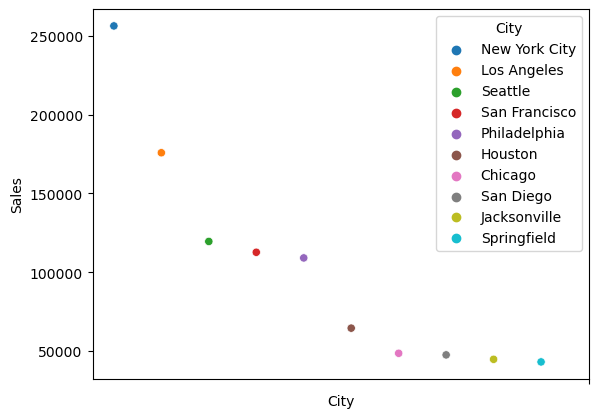

In [42]:
scatter = sns.scatterplot(x='City', y='Sales', hue="City", data=performers.head(10))
scatter.set_xticks('')

Lastly, we'll test the relationship between a city's sales and their profits. To no one's surprise, they are significantly related with a clear dependence on each other.

In [43]:
x = df["Sales"]
y = df["Profit"]

result = pearsonr(x, y)
print(result)
stat, p = result
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
  print("Sales and Profit are independent of each other")
else:
  print("Sales and Profit are related")

print(result.confidence_interval())

PearsonRResult(statistic=0.4790641983922818, pvalue=0.0)
stat=0.479, p=0.000
Sales and Profit are related
ConfidenceInterval(low=0.46381385880040094, high=0.4940307116867134)


## Inferential Data Analysis

- Profit made per Region


/var/folders/z5/jt2rq2vj211dw27l027q0rsc0000gn/T/ipykernel_36944/1260960313.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.sum is deprecated. In a future version, a TypeError will be raised. Before calling .sum, select only columns which should be valid for the function.
  topdf = df.groupby(['Sub_Category','Region'],).sum(numeric_only=False)[['Profit']].reset_index()


[]

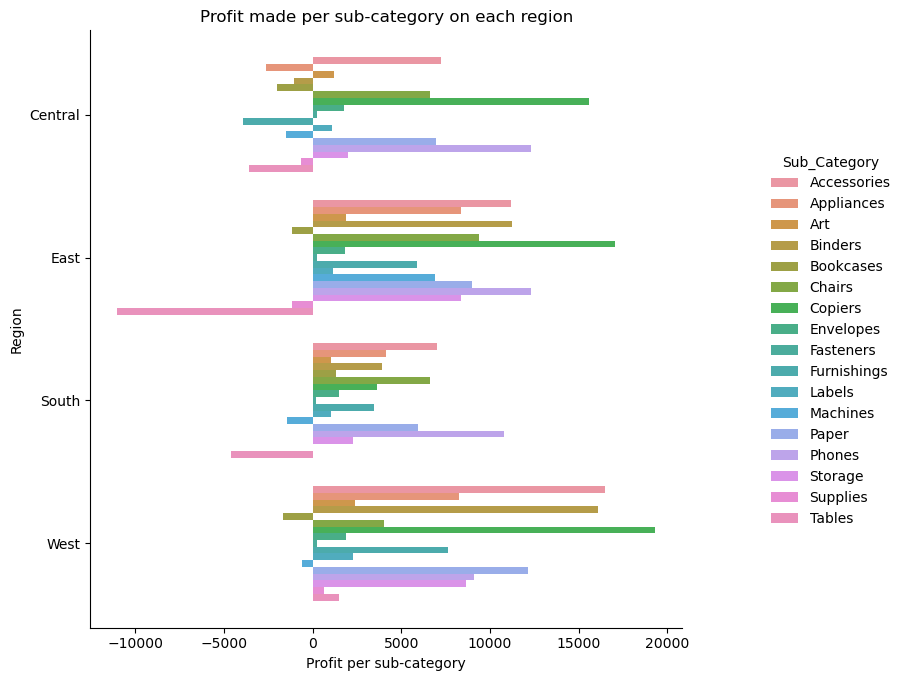

In [44]:
topdf = df.groupby(['Sub_Category','Region'],).sum(numeric_only=False)[['Profit']].reset_index()
ax = sns.catplot(data=topdf, x ="Profit",y="Region", hue ="Sub_Category",kind="bar")
ax.set(
    xlabel='Profit per sub-category',
    ylabel='Region',
    title='Profit made per sub-category on each region',
)
ax.fig.set_figwidth(10)
ax.fig.set_figheight(7)
plt.plot()

Profit made depending on sub category and divided based on the region. the hypothesized state is that with more sales in each location, they are bound to have subcategories to have net loss as they might have been returned or were broken to not be able to be sold.

- Profit made per category from every recorded sale 

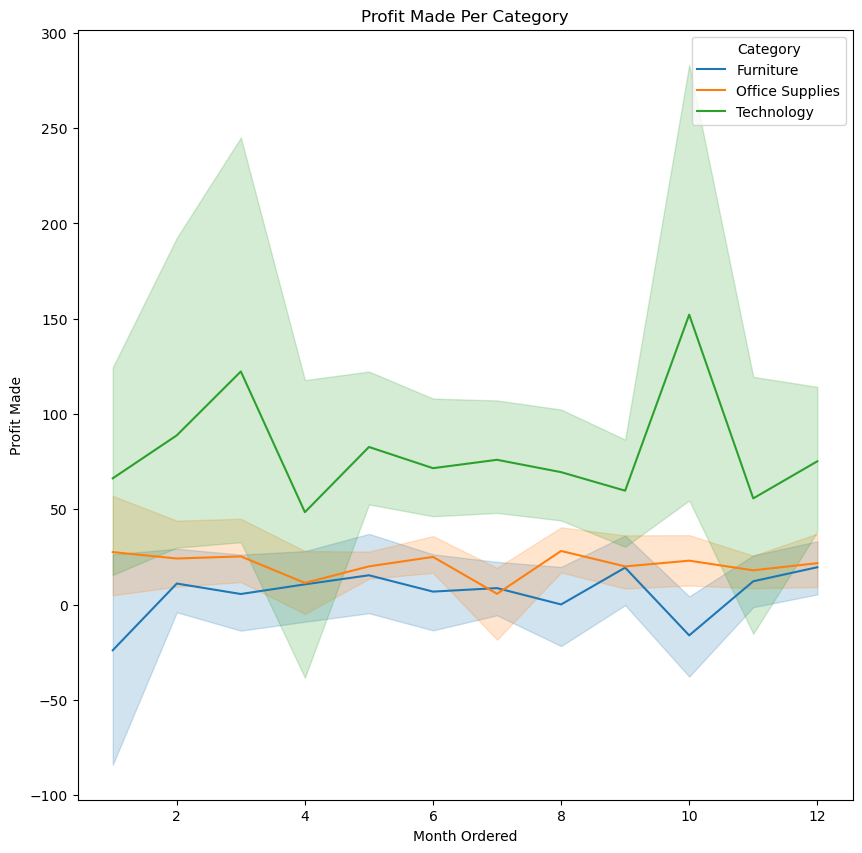

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data = df, x=df.Order_Date.dt.month,y = "Profit",hue = "Category")
ax.set(
    xlabel='Month Ordered',
    ylabel='Profit Made',
    title='Profit Made Per Category',
)
plt.show()

Profit made from the first recorded order and sale to the most recent is used to create a line graph that demonstrates which category is most sold depending on the year and which are more profitable.


- Products sold based on Category and Region


In [46]:
top_sellers = df['Region'].groupby(df['Sub_Category']).value_counts()
top_sellers

Sub_Category  Region 
Accessories   West       258
              East       206
              Central    183
              South      128
Appliances    West       136
                        ... 
Supplies      South       29
Tables        West       116
              East        80
              Central     72
              South       51
Name: Region, Length: 68, dtype: int64

[]

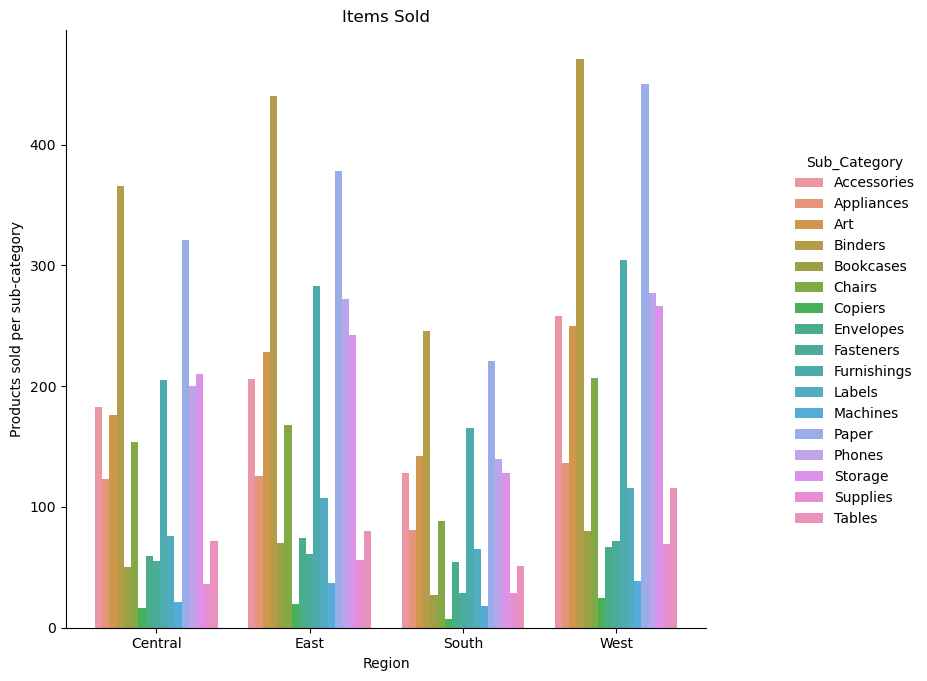

In [47]:
countdf = df.groupby(['Sub_Category','Region']).count()[['Row_ID']].reset_index()
ax = sns.catplot(data=countdf, x="Region",y ="Row_ID", hue ="Sub_Category",kind="bar")
ax.set(
    xlabel='Region',
    ylabel='Products sold per sub-category',
    title='Items Sold',
)
ax.fig.set_figwidth(10)
ax.fig.set_figheight(7)
plt.plot()

Products that were sold per category were hypothesized to be sold more in the busiest cities or trade such as the East and West. in the graph it shows that the west and east have sold more compared to the central and south regions of the US the hypothesis makes sense that as the major cities or trade are more inclined to have the items and more traffic happens.